#Loan Default Prediction using various machine learning models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Loan_Default.csv")

In [3]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
df.shape

(148670, 34)

In [5]:
pd.set_option("display.max_columns", df.shape[-1])  
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
df.columns= df.columns.str.lower()

In [8]:
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [9]:
# we can drop 'id' ,'loan_limit' , 'gender' ,'approv_in_adv' ,'loan_purpose' ,'open_credit' 
# ,'business_or_commercial'  because they don't add any valiable information 
# we can drop 'year' as it includes only one year 2019
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [10]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [11]:
df.shape

(148670, 10)

In [12]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


In [13]:
df.duplicated().sum() 

6

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


### Filling Null values with Mode and Mean

In [17]:
# Checking for Nan values 

df.isna().sum() 

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [18]:
# Mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [19]:
# Mode 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [20]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

# Some Characteristics of Data & Visualization

In [21]:
df['loan_amount'].max()

3576500

In [22]:
df['loan_amount'].min()

16500

In [23]:
df['age'].value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [24]:
df['rate_of_interest'].max()

8.0

In [25]:
df['rate_of_interest'].min()    

0.0

In [26]:
df['rate_of_interest'].mean()

4.045481969579513

In [27]:
df['status'].value_counts()

0    112027
1     36637
Name: status, dtype: int64

In [28]:
df['property_value'].value_counts()

4.979002e+05    15096
3.080000e+05     2791
2.580000e+05     2763
3.580000e+05     2679
4.080000e+05     2537
                ...  
4.648000e+06        1
3.878000e+06        1
5.758000e+06        1
2.618000e+06        1
2.698000e+06        1
Name: property_value, Length: 386, dtype: int64

In [29]:
df['property_value'].max()

16508000.0

In [30]:
df['property_value'].min()

8000.0

In [31]:
df['loan_amount'].max()

3576500

In [32]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [33]:
mask = df['income']==df['income'].max()
df[mask]['status']

62237    1
Name: status, dtype: int64

In [34]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [35]:
mask = df['income']==df['income'].min()           
df[mask]['status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: status, Length: 1259, dtype: int64

In [36]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: rate_of_interest, dtype: int64

In [37]:
df['income'].value_counts()

6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: income, Length: 1002, dtype: int64

In [38]:
df['income'].mean()

6957.392164451898

In [39]:
mask=df['income']<2000

In [40]:
mask.value_counts()            # there is income less than 2000

False    140706
True       7958
Name: income, dtype: int64

In [50]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [51]:
mask=df['income']<2000
mask.value_counts()

False    148664
Name: income, dtype: int64

In [52]:
df['income'].min()

6957.392164451898

In [53]:
df['rate_of_interest'].value_counts()

4.045482    39609
3.990000    14454
3.625000     8799
3.875000     8592
3.750000     8473
            ...  
6.375000        1
2.125000        1
5.300000        1
4.865000        1
2.700000        1
Name: rate_of_interest, Length: 125, dtype: int64

In [54]:
df['rate_of_interest'].min()      # interest rate shall not be zero

2.125

In [55]:
df['rate_of_interest'].mean()

4.049983858453122

In [56]:
mask=df['rate_of_interest']==0
mask.value_counts()

False    148664
Name: rate_of_interest, dtype: int64

In [57]:
df['rate_of_interest']=df['rate_of_interest'].apply(lambda x: x if x not in mask else df['rate_of_interest'].mean())

In [58]:
df['rate_of_interest'].min()

2.125

# Data Visualization

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

<AxesSubplot: xlabel='status', ylabel='count'>

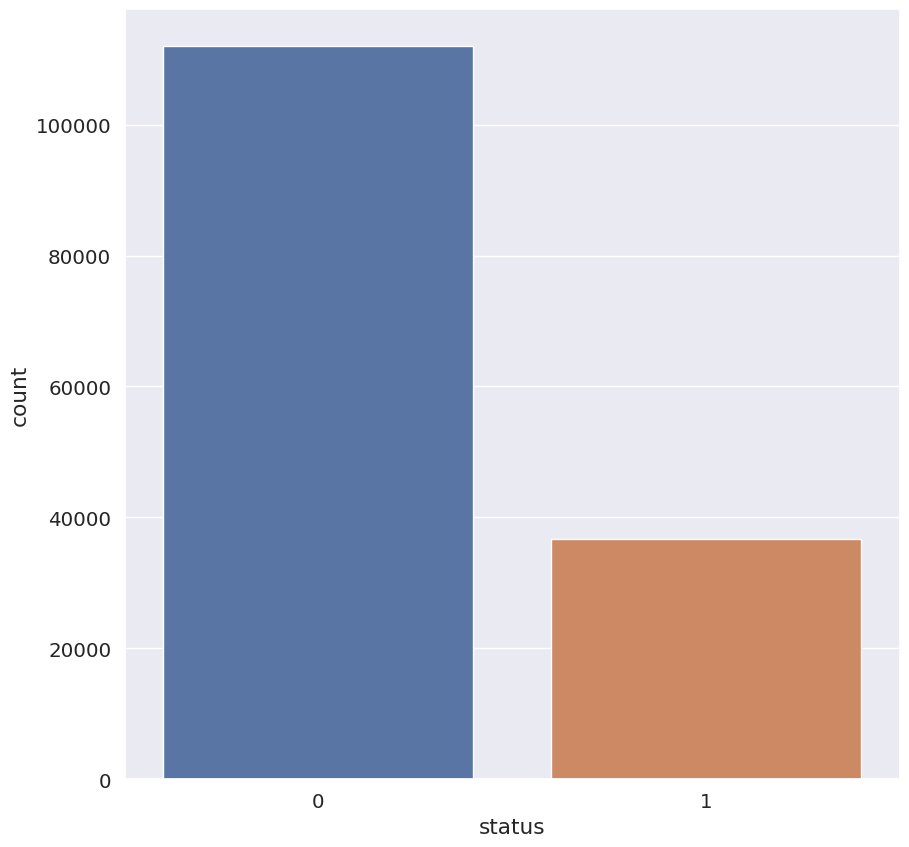

In [59]:
sns.countplot(data=df , x='status')

<AxesSubplot: xlabel='age', ylabel='count'>

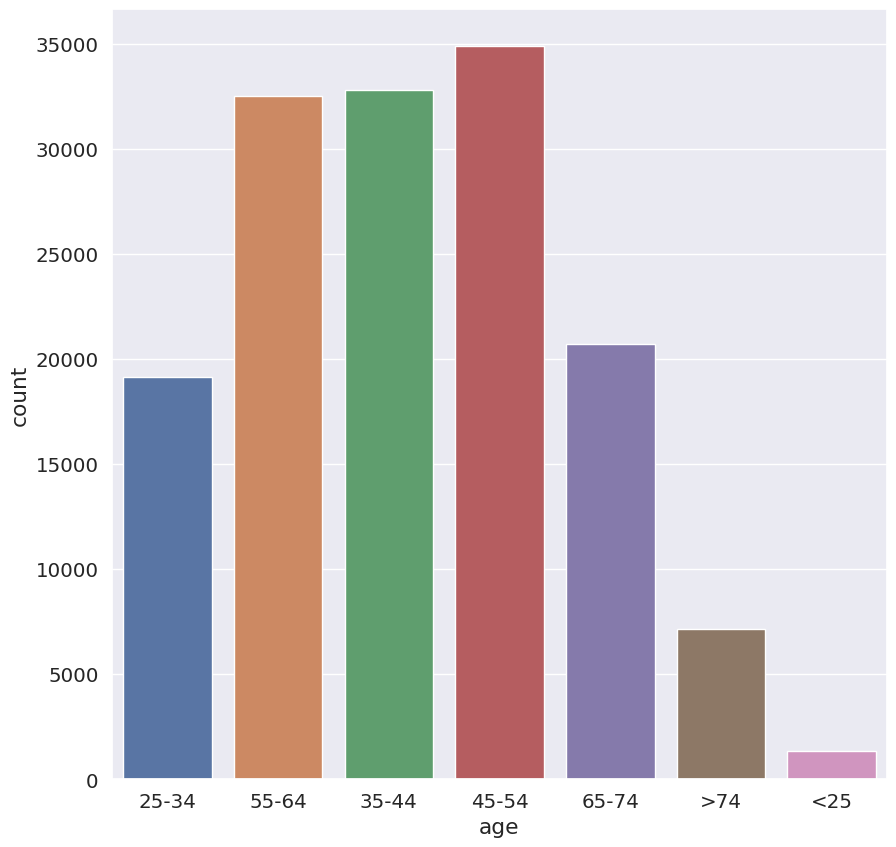

In [60]:
sns.countplot(data=df , x='age')

<AxesSubplot: >

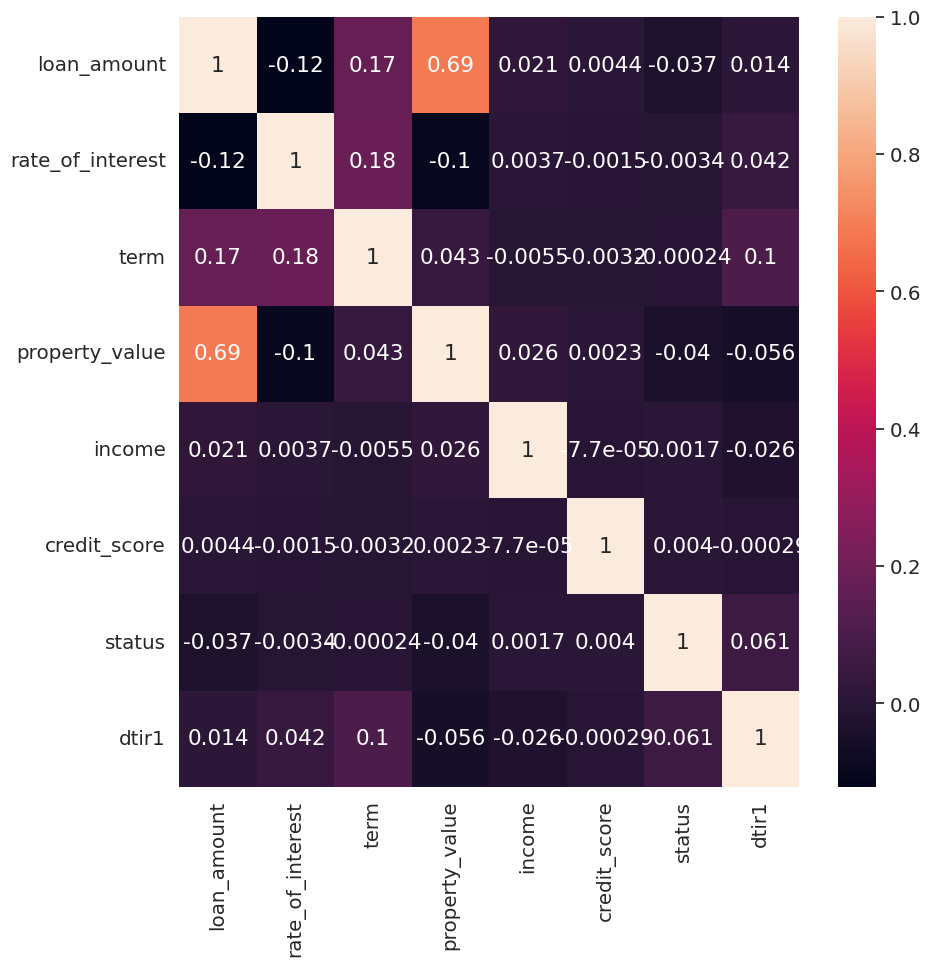

In [61]:
sns.heatmap(df.corr() , annot = True)

# Dealing with non numerical values 

### All data must be numerical to be used in the machine learning model

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


In [63]:
df['new'] = ((df['loan_amount']/ df['property_value'])*df['rate_of_interest'])   #New metrics (Novelty)
df['new1']=df['loan_amount']/df['credit_score']

In [64]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   new               148664 non-null  float64
 9   new1              148664 non-null  float64
 10  loan_type_type2   148664 non-null  uint8  
 11  loan_type_type3   148664 non-null  uint8  
 12  age_35-44         148664 non-null  uint8  
 13  age_45-54         148664 non-null  uint8  
 14  age_55-64         148664 non-null  uint8  
 15  age_65-74         148664 non-null  uint8  
 16  age_<25           14

In [66]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,3.994056,153.693931,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,1.677830,374.094203,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,3.648898,487.410072,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,2.948518,777.683135,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,0,39.000000,3.717254,1156.976744,0,0,0,0,0,0,0,0


In [67]:
df.shape

(148664, 18)

# Data Split to Train and Test Sets

In [68]:
x = df.drop('status', axis=1)
y = df['status']

In [69]:
x

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,3.994056,153.693931,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,1.677830,374.094203,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,3.648898,487.410072,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,2.948518,777.683135,0,0,0,1,0,0,0,0
4,696500,4.045482,360.0,758000.000000,6957.392164,602,39.000000,3.717254,1156.976744,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,2.243524,662.367223,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,3.862862,1030.755712,0,0,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,1.916638,636.039886,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,2.473921,266.621438,0,0,0,0,1,0,0,0


In [70]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: status, Length: 148664, dtype: int64

In [71]:
x.shape

(148664, 17)

In [72]:
y.shape

(148664,)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [74]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
121129,486500,4.045482,360.0,488000.0,6957.392164,855,44.0,4.033047,569.005848,0,1,1,0,0,0,0,0
77261,306500,3.990000,360.0,378000.0,6957.392164,772,44.0,3.235278,397.020725,0,0,0,1,0,0,0,0
20831,276500,4.500000,360.0,348000.0,6957.392164,559,40.0,3.575431,494.633274,0,0,1,0,0,0,0,0
127668,106500,4.500000,360.0,258000.0,6957.392164,710,44.0,1.857558,150.000000,0,0,0,0,0,0,0,1
61853,116500,3.990000,360.0,138000.0,6957.392164,783,45.0,3.368370,148.786718,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12620,206500,3.625000,180.0,468000.0,6957.392164,724,39.0,1.599493,285.220994,0,0,0,0,0,1,0,0
139786,286500,3.875000,360.0,358000.0,6957.392164,797,47.0,3.101082,359.473024,0,0,0,1,0,0,0,0
50353,336500,4.045482,360.0,448000.0,6957.392164,855,42.0,3.038627,393.567251,0,0,0,0,0,0,0,0
61519,206500,3.250000,360.0,548000.0,6957.392164,699,45.0,1.224681,295.422031,0,0,0,1,0,0,0,0


In [75]:
x_train.shape

(118931, 17)

In [76]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,new,new1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
84480,386500,3.375000,360.0,408000.0,6957.392164,838,31.000000,3.197151,461.217184,0,1,0,1,0,0,0,0
99447,236500,3.375000,240.0,558000.0,6957.392164,617,48.000000,1.430444,383.306321,0,0,0,1,0,0,0,0
97510,266500,4.045482,360.0,278000.0,6957.392164,758,49.000000,3.878133,351.583113,0,0,0,1,0,0,0,0
96311,216500,3.990000,360.0,238000.0,6957.392164,690,43.000000,3.629559,313.768116,0,0,0,0,0,0,0,0
71674,176500,4.180000,360.0,228000.0,6957.392164,551,28.000000,3.235833,320.326679,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102527,426500,4.250000,324.0,708000.0,6957.392164,778,44.000000,2.560205,548.200514,0,0,0,0,1,0,0,0
64443,406500,3.875000,360.0,978000.0,6957.392164,846,38.000000,1.610621,480.496454,0,0,0,0,0,1,0,0
12220,296500,3.500000,360.0,328000.0,6957.392164,560,37.732932,3.163872,529.464286,1,0,0,1,0,0,0,0
4532,326500,3.990000,180.0,398000.0,6957.392164,546,21.000000,3.273204,597.985348,0,0,0,1,0,0,0,0


In [77]:
x_test.shape

(29733, 17)

In [78]:
y_train

121129    1
77261     0
20831     0
127668    0
61853     0
         ..
12620     0
139786    0
50353     0
61519     0
7614      0
Name: status, Length: 118931, dtype: int64

In [79]:
x_train.shape

(118931, 17)

In [80]:
y_train.shape

(118931,)

In [81]:
y_train.value_counts()

0    89694
1    29237
Name: status, dtype: int64

In [82]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [83]:
y_train.value_counts()

1    89694
0    89694
Name: status, dtype: int64

# Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Precison:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))

Confusion Matrix:
 [[21815   518]
 [  426  6974]]
Accuracy: 0.968250765143107
ROC AUC Score: 0.9596190281984845
Precison: 0.9308595835557928
Recall: 0.9424324324324325


# Random forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier(n_estimators=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Precison:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))

Confusion Matrix:
 [[21634   699]
 [  491  6909]]
Accuracy: 0.9599771297884505
ROC AUC Score: 0.9511748370185437
Precison: 0.9081230283911672
Recall: 0.9336486486486486


# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=LogisticRegression(random_state=1234)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Precison:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))

Confusion Matrix:
 [[10443 12030]
 [ 3218  4042]]
Accuracy: 0.48716913866747386
ROC AUC Score: 0.5107201368915426
Precison: 0.25149328023892487
Recall: 0.5567493112947658


# K-Nearest Neighbor (KNN) Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=KNeighborsClassifier(n_neighbors=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Precison:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))

Confusion Matrix:
 [[20171  2302]
 [ 3405  3855]]
Accuracy: 0.8080583863047792
ROC AUC Score: 0.7142788517938697
Precison: 0.6261166152346922
Recall: 0.53099173553719


In [80]:
columns= ['age_<25','age_>74']
x_train.drop(columns,axis=1, inplace =True)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       179108 non-null  int64  
 1   rate_of_interest  179108 non-null  float64
 2   term              179108 non-null  float64
 3   property_value    179108 non-null  float64
 4   income            179108 non-null  float64
 5   credit_score      179108 non-null  int64  
 6   dtir1             179108 non-null  float64
 7   new               179108 non-null  float64
 8   new1              179108 non-null  float64
 9   loan_type_type2   179108 non-null  uint8  
 10  loan_type_type3   179108 non-null  uint8  
 11  age_35-44         179108 non-null  uint8  
 12  age_45-54         179108 non-null  uint8  
 13  age_55-64         179108 non-null  uint8  
 14  age_65-74         179108 non-null  uint8  
dtypes: float64(7), int64(2), uint8(6)
memory usage: 13.3 MB


In [81]:
x_test.info()
columns= ['age_<25','age_>74']
x_test.drop(columns,axis=1, inplace =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29733 entries, 62021 to 106328
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amount       29733 non-null  int64  
 1   rate_of_interest  29733 non-null  float64
 2   term              29733 non-null  float64
 3   property_value    29733 non-null  float64
 4   income            29733 non-null  float64
 5   credit_score      29733 non-null  int64  
 6   dtir1             29733 non-null  float64
 7   new               29733 non-null  float64
 8   new1              29733 non-null  float64
 9   loan_type_type2   29733 non-null  uint8  
 10  loan_type_type3   29733 non-null  uint8  
 11  age_35-44         29733 non-null  uint8  
 12  age_45-54         29733 non-null  uint8  
 13  age_55-64         29733 non-null  uint8  
 14  age_65-74         29733 non-null  uint8  
 15  age_<25           29733 non-null  uint8  
 16  age_>74           29733 non-null  u

# XGBoost Classifier

In [82]:
import xgboost as xgb
x_train.columns[x_train.columns.str.contains("[\[\]<]")] 

xgb_classifier = xgb.XGBClassifier(max_depth=20)
xgb_classifier.fit(x_train,y_train)
y_pred = xgb_classifier.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Precison:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))




Confusion Matrix:
 [[21926   547]
 [  174  7086]]
Accuracy: 0.9757508492247671
ROC AUC Score: 0.9758463691783674
Precison: 0.9283374819861129
Recall: 0.9760330578512396


In [101]:
x_test.head()
print(x_test.dtypes)

loan_amount           int64
rate_of_interest    float64
term                float64
property_value      float64
income              float64
credit_score          int64
dtir1               float64
new                 float64
new1                float64
loan_type_type2       uint8
loan_type_type3       uint8
age_35-44             uint8
age_45-54             uint8
age_55-64             uint8
age_65-74             uint8
dtype: object


# Comparing all models using ROC Curve

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               xgb.XGBClassifier(max_depth=20),
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(n_estimators=2)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

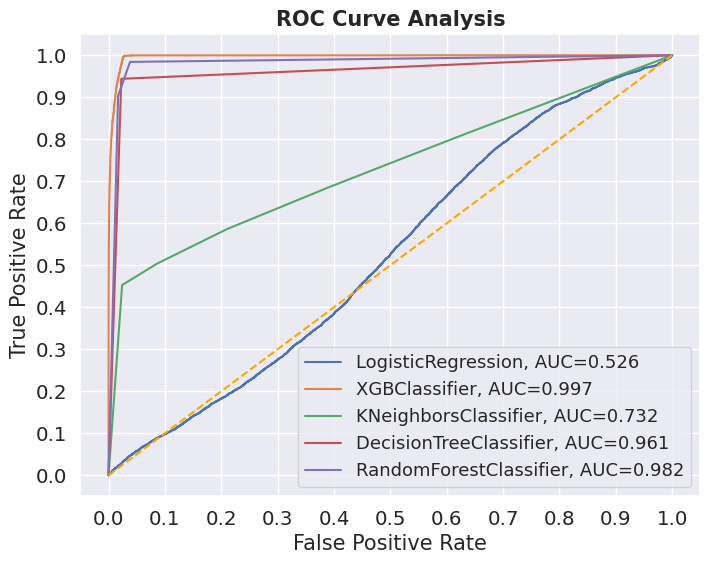

In [83]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# End